In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [20]:
df = pd.read_csv("Cesium_Aluminum/CesiumAl0degrees40gain610volts120sec.Spe", skiprows=12 ,skipfooter=14, header=None)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [21]:
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1019,214
1020,185
1021,206
1022,215


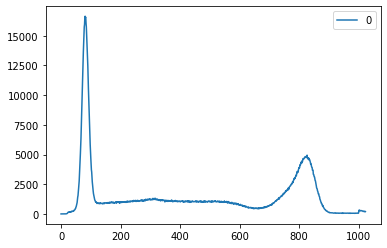

In [22]:
df.plot()

In [36]:
df2 = df[600:1000]
df2

,0
600,763
601,746
602,771
603,804
604,766
...,...
995,65
996,66
997,56
998,56


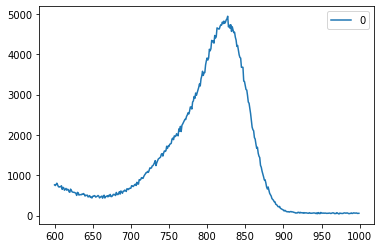

In [94]:
df2.plot()
x = np.linspace(600,999,999-600+1)
y = df2[0].to_numpy()

In [77]:
# Utility functions

from scipy.optimize import curve_fit

def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[ max(y), mean, sigma])
    return popt, pcov

def normal_gauss(x,A,x0,sigma):
    return A/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-x0)**2/(2*sigma**2))

def gauss_fit_to_spectrum(input_x,input_y,x1,x2, angle):
    # Select peak to fit
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]
    [A, x0, sigma],pcov = gauss_fit(xdata, ydata)
    # offset, amplitude, center, sigma
    
    [A_err, x0_err, sigma_err] = np.sqrt(np.diag(pcov))
    print( [A_err, x0_err, sigma_err])
    # Plot input spectra with correct scaling
    plt.plot(input_x*m+b,input_y)
    
    # Plot selected peak to fit
    plt.plot(xdata*m+b, ydata, label='data')
    
    # Plot fitted gaussian to peak
    plt.plot(input_x*m+b, normal_gauss(input_x, A, x0, sigma), '--r', label='fit')
    plt.legend()
    plt.title('Gaussian fit ' + angle + ' deg')
    plt.xlabel('Energy Levels (KeV)')
    plt.ylabel('Counts')
    plt.show()
    return np.array([x0*m+b,A,sigma,x0_err,A_err,sigma_err])

In [57]:
popt, pcov = gauss_fit(x,y)

In [58]:
popt

array([4446.66874492,  812.68358608,   41.82972344])

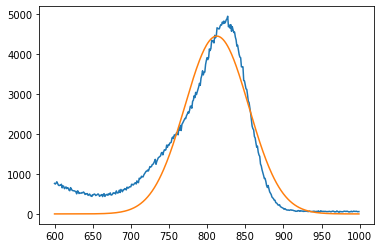

In [59]:
plt.plot(x,y)
plt.plot(x, gauss(x, *popt))

In [62]:
np.sqrt(np.diag(pcov))

array([63.0506617 ,  0.68488901,  0.68488904])

<ErrorbarContainer object of 3 artists>

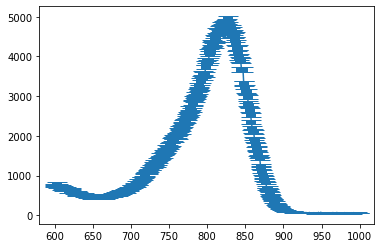

In [73]:
err = np.sqrt(y)

plt.errorbar(x,y,yerr=err,elinewidth=10, capsize=10)

In [122]:
def gauss_fit2(x, y, err):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, sigma=err, absolute_sigma=True, p0=[ max(y), mean, sigma])
    return popt, pcov

In [123]:
popt, pcov = gauss_fit2(x,y,err)

In [124]:
print(popt)
print(np.sqrt(np.diag(pcov)))

[4086.79070316  803.11407685   43.27234983]
[7.78588805 0.06959231 0.05072278]


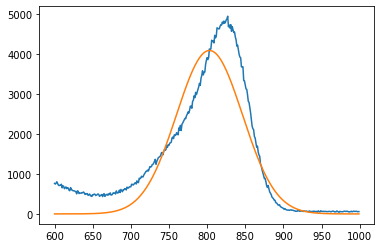

In [125]:
plt.plot(x,y)
plt.plot(x,gauss(x,*popt))

In [126]:
df3 = df[800:1000]
x2 = np.linspace(800,999,999-800+1)
y2 = df3[0].to_numpy()

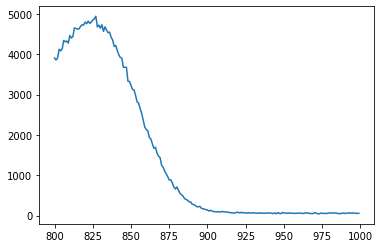

In [127]:
plt.plot(x2,y2)

In [128]:
err2 = np.sqrt(y2)
popt2,pcov2 = gauss_fit2(x2,y2,err2)

In [129]:
print(popt2)
print(np.sqrt(np.diag(pcov2)))

[4908.10238534  822.39297228   29.25937064]
[10.80430223  0.1231601   0.07926339]


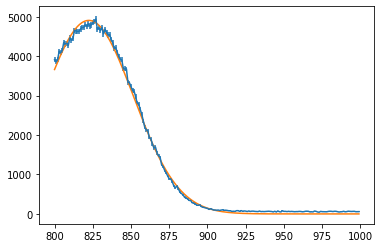

In [130]:
plt.errorbar(x2,y2,yerr=err2)
plt.plot(x2,gauss(x2,*popt2))

In [138]:
def chi2(observed,expected,err):
    return sum((observed - expected)**2 / err**2)

In [139]:
c2 = chi2(y2, gauss(x2,*popt2), err2)
print(c2)

5316.746065094805


<ErrorbarContainer object of 3 artists>

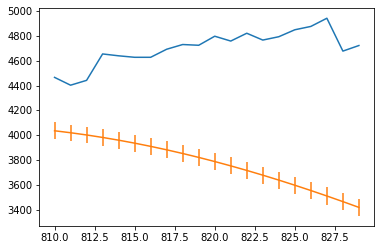

In [141]:
plt.plot(x[210:230],y[210:230])
plt.errorbar(x[210:230],gauss(x[210:230],*popt),yerr=np.sqrt(y[210:230]))

In [140]:
5316 / 197

26.98477157360406

In [143]:
sum(y2) / 120

2393.2